In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/train.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1138,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train = train[['label']]
train = train.drop('label', axis=1)
train_array = train.values
X_train = train_array.reshape(-1, 28, 28)

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

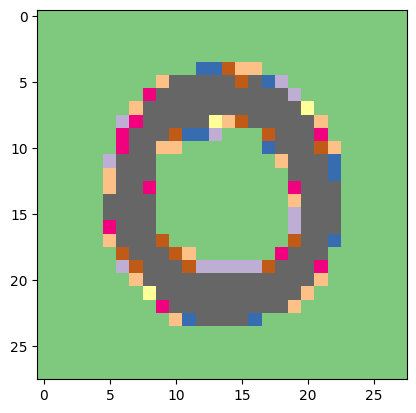

In [ ]:
plt.imshow(X_train[1], cmap='Accent')

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = keras.Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=256, verbose=1, validation_split=0.2)

Epoch 1/20
4/4 [==============================] - 11s 3s/step - loss: 15.3389 - accuracy: 0.1051 - val_loss: nan - val_accuracy: 0.0873
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 2.8024 - accuracy: 0.1851 - val_loss: nan - val_accuracy: 0.2314
Epoch 3/20
4/4 [==============================] - 7s 2s/step - loss: 2.2276 - accuracy: 0.2136 - val_loss: nan - val_accuracy: 0.2620
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 2.0807 - accuracy: 0.3472 - val_loss: nan - val_accuracy: 0.5895
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 1.6355 - accuracy: 0.6090 - val_loss: nan - val_accuracy: 0.6987
Epoch 6/20
4/4 [==============================] - 7s 2s/step - loss: 0.9534 - accuracy: 0.7306 - val_loss: nan - val_accuracy: 0.7162
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.6501 - accuracy: 0.7875 - val_loss: nan - val_accuracy: 0.7991
Epoch 8/20
4/4 [==============================] - 7s 2s/step

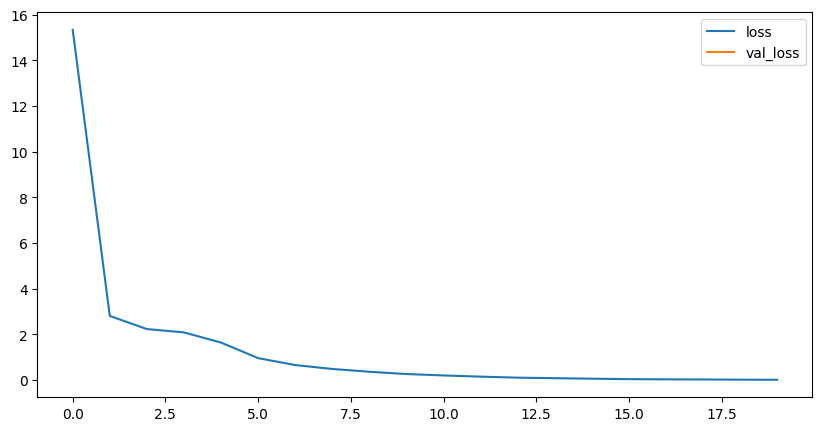

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
test = pd.read_csv('/content/test.csv')
test_array = test.values
X_test = test_array.reshape(-1, 28, 28)

In [ ]:
model_predict = model.predict(X_test)

162/162 [==============================] - 12s 72ms/step


In [ ]:
result = [np.argmax(i) for i in model_predict]

In [ ]:
result

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 3,
 0,
 4,
 5,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 7,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 8,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 3,
 9,
 2,
 3,
 5,
 4,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 3,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 9,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 8,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 9,
 8,
 3,
 8,
